In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as model_selection
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from IPython.display import Image
import graphviz

In [46]:
diabetes = pd.read_csv('diabetes_prediction_dataset.csv').dropna()
diabetes['gender'] = diabetes['gender'].replace({'Male': 1, 'Female': 2, 'Other':3})
diabetes['smoking_history'] = diabetes['smoking_history'].replace({'current': 1, 'ever': 2, 'former': 3, 'never': 4, 'No Info': 5, 'not current': 6})
diabetes.head()

gender   age  hypertension  heart_disease  smoking_history    bmi   
0       2  80.0             0              1                4  25.19  \
1       2  54.0             0              0                5  27.32   
2       1  28.0             0              0                4  27.32   
3       2  36.0             0              0                1  23.45   
4       1  76.0             1              1                1  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

In [47]:
diabetes['diabetes'].value_counts()
diabetes.dtypes

gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [48]:
features = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']

In [49]:
# 1st Algorithm -- Logistic Regression

In [50]:
X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y)

In [52]:
model = linear_model.LogisticRegression(penalty=None, verbose=True)

In [53]:
model.fit(X = X_train, y=y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


LogisticRegression(penalty=None, verbose=True)

In [54]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
y_test

762      0
36907    0
88275    0
61023    0
26529    0
        ..
7039     0
21461    0
85319    0
65678    0
99061    0
Name: diabetes, Length: 20000, dtype: int64

In [56]:
metrics.confusion_matrix(y_test, y_pred, labels=[0,1])

array([[18027,   273],
       [  631,  1069]], dtype=int64)

In [57]:
print(metrics.classification_report(y_test, y_pred, zero_division=1.0))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.80      0.63      0.70      1700

    accuracy                           0.95     20000
   macro avg       0.88      0.81      0.84     20000
weighted avg       0.95      0.95      0.95     20000



In [58]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9548


In [59]:
# 2nd Algorithm -- Desicion Tree

In [60]:
X = diabetes[features]
y= diabetes.diabetes

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [62]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.19696 to fit


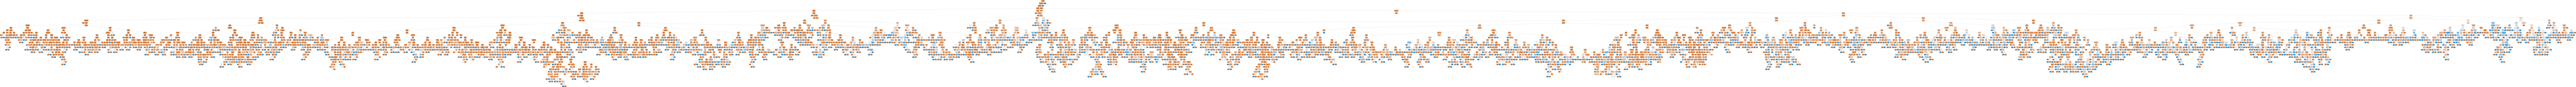

In [63]:
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X.columns,
                           class_names=diabetes['diabetes'].unique().astype(str).tolist(),
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
Image(graph.pipe(format='png'))

In [64]:
metrics.confusion_matrix(y_test, y_pred, labels=[0,1])

array([[17791,   522],
       [  435,  1252]], dtype=int64)

In [65]:
print(metrics.classification_report(y_test, y_pred, zero_division=1.0))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18313
           1       0.71      0.74      0.72      1687

    accuracy                           0.95     20000
   macro avg       0.84      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000



In [66]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.95215
